In [1]:
#importing libraries
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

/opt/anaconda3/envs/p_da_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [2]:
df_DA=df[df['job_title']=='Data Analyst'].copy()

In [3]:
df_DA["job_posted_month_no"]=df_DA["job_posted_date"].dt.month

In [4]:
df_DA_exploded=df_DA.explode('job_skills')

In [6]:
df_DA_pivot=df_DA_exploded.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)


In [7]:
df_DA_pivot.loc['total']=df_DA_pivot.sum()

In [8]:
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,watson,webex,windows,wire,word,workfront,wrike,wsl,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,51,1,128,7,1,1,0,2,3,9,...,3,6,35,0,290,0,1,0,1,11
2,53,0,90,5,3,0,2,6,3,7,...,3,3,43,1,212,0,2,1,2,8
3,43,0,78,6,6,0,0,6,2,7,...,5,4,29,3,222,0,0,0,1,11
4,35,1,93,3,1,1,1,1,0,4,...,2,1,44,4,235,1,0,0,0,3
5,37,1,67,2,4,0,0,1,2,4,...,0,2,32,0,167,0,0,0,2,2
6,42,5,69,3,1,0,2,3,1,9,...,2,1,26,2,225,0,0,0,1,4
7,48,0,68,2,1,0,1,4,0,4,...,0,1,31,2,194,0,0,0,1,3
8,57,2,73,3,0,0,0,2,2,17,...,3,1,33,2,211,0,0,0,2,5
9,25,1,58,3,1,1,0,4,4,1,...,2,0,23,3,132,0,0,0,0,5


In [10]:
df_DA_pivot.sort_values(by='total',axis=1,ascending=False,inplace=True)

In [11]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,mxnet,chainer,heroku,debian,clojure,pascal,suse,svelte,twilio,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2916,1820,1641,1474,1114,851,912,305,325,290,...,0,0,0,1,0,0,0,0,0,0
2,1972,1233,1140,965,805,589,580,255,229,212,...,0,0,0,0,0,0,0,0,0,0
3,1952,1243,1115,1022,808,586,556,204,221,222,...,0,0,0,0,0,0,1,0,0,0
4,1934,1222,1129,960,753,579,512,195,215,235,...,0,0,0,0,0,0,0,0,0,0
5,1844,1135,1057,886,720,558,400,183,196,167,...,0,0,0,0,0,0,0,0,0,0
6,2000,1238,1185,994,869,629,504,208,211,225,...,0,0,0,0,0,0,0,0,0,0
7,1891,1207,1142,944,773,608,454,192,194,194,...,0,0,0,0,0,1,0,0,0,1
8,2306,1537,1398,1209,1032,747,570,234,225,211,...,0,0,0,0,1,0,0,0,0,0
9,1767,1138,1041,883,808,521,426,183,127,132,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_DA_pivot.drop('total',inplace=True)

In [13]:
df_DA_pivot


job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,mxnet,chainer,heroku,debian,clojure,pascal,suse,svelte,twilio,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2916,1820,1641,1474,1114,851,912,305,325,290,...,0,0,0,1,0,0,0,0,0,0
2,1972,1233,1140,965,805,589,580,255,229,212,...,0,0,0,0,0,0,0,0,0,0
3,1952,1243,1115,1022,808,586,556,204,221,222,...,0,0,0,0,0,0,1,0,0,0
4,1934,1222,1129,960,753,579,512,195,215,235,...,0,0,0,0,0,0,0,0,0,0
5,1844,1135,1057,886,720,558,400,183,196,167,...,0,0,0,0,0,0,0,0,0,0
6,2000,1238,1185,994,869,629,504,208,211,225,...,0,0,0,0,0,0,0,0,0,0
7,1891,1207,1142,944,773,608,454,192,194,194,...,0,0,0,0,0,1,0,0,0,1
8,2306,1537,1398,1209,1032,747,570,234,225,211,...,0,0,0,0,1,0,0,0,0,0
9,1767,1138,1041,883,808,521,426,183,127,132,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_da_total=df_DA_exploded.groupby('job_posted_month_no').size()

In [22]:
df_da_per=df_DA_pivot.div(df_da_total/100,axis=0)

In [23]:
df_da_per.reset_index(inplace=True)

In [24]:
df_da_per['job_posted_month']=df_da_per['job_posted_month_no'].apply(lambda x: pd.to_datetime(str(x),format='%m').strftime('%B'))

In [25]:
df_da_per.set_index('job_posted_month',inplace=True)

In [26]:
df_da_per.drop(columns='job_posted_month_no',inplace=True)

In [27]:
df_da_per


job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,...,mxnet,chainer,heroku,debian,clojure,pascal,suse,svelte,twilio,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,15.600257,9.736786,8.779157,7.885727,5.959769,4.552750,4.879093,1.631714,1.738712,1.551466,...,0.000000,0.000000,0.000000,0.00535,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
February,15.260796,9.541867,8.822164,7.467884,6.229686,4.558118,4.488469,1.973379,1.772171,1.640613,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
March,15.264310,9.720050,8.719112,7.991867,6.318424,4.582421,4.347826,1.595246,1.728183,1.736003,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00782,0.000000,0.000000,0.000000
April,15.337034,9.690722,8.953212,7.613006,5.971451,4.591594,4.060270,1.546392,1.704996,1.863600,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
May,16.019460,9.860134,9.182521,7.696985,6.254887,4.847537,3.474937,1.589784,1.702719,1.450786,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
June,15.524334,9.609563,9.198168,7.715594,6.745323,4.882403,3.912132,1.614531,1.637817,1.746488,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
July,15.492381,9.888579,9.356054,7.733901,6.332951,4.981157,3.719482,1.572997,1.589382,1.589382,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.008193,0.00000,0.000000,0.000000,0.008193
August,15.087673,10.056268,9.146820,7.910233,6.752159,4.887464,3.729390,1.531013,1.472128,1.380529,...,0.000000,0.000000,0.000000,0.00000,0.006543,0.000000,0.00000,0.000000,0.000000,0.000000
September,15.724838,10.127258,9.264038,7.857969,7.190531,4.636469,3.791047,1.628549,1.130195,1.174691,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [29]:
df_plot=df_da_per.iloc[:,:5]

In [55]:
import seaborn as sns
from matplotlib.ticker import PercentFormatter

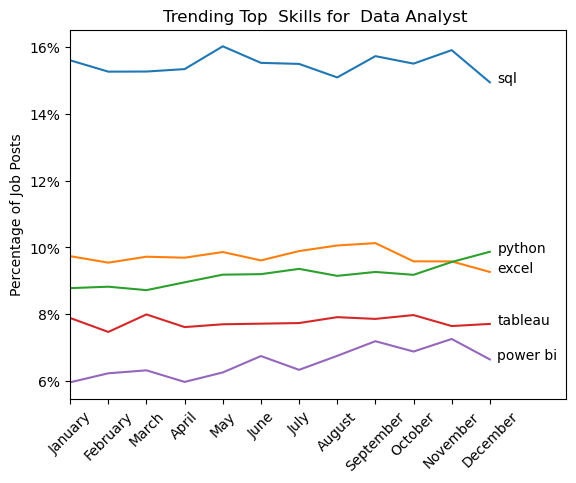

In [58]:

sns.lineplot(data=df_plot,dashes=False,palette='tab10')
plt.xticks(rotation=45)
plt.ylabel('Percentage of Job Posts')
plt.xlabel('')
plt.title('Trending Top  Skills for  Data Analyst ')
plt.legend().remove()
plt.xlim(0,13)
for i in range(len(df_plot.columns)):
    plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i],color='black',fontsize=10)
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))    
plt.show()


